In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Dataset 'sales_data.csv' created successfully!


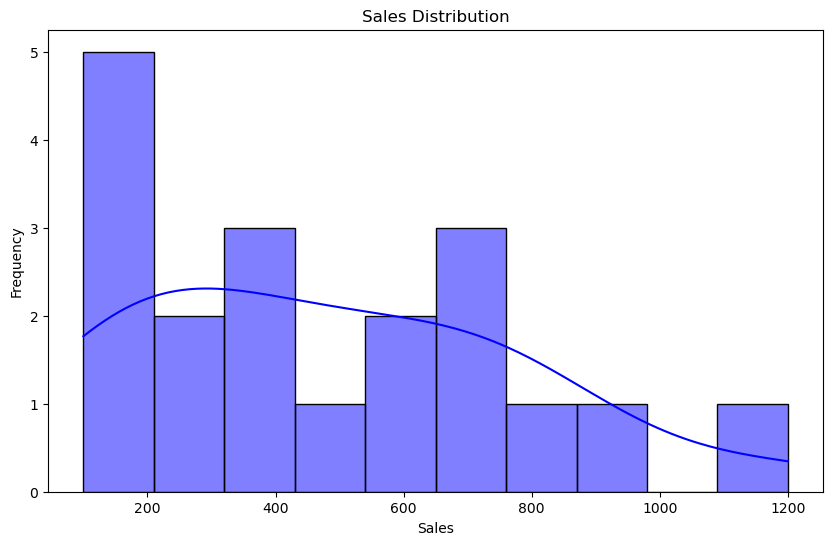

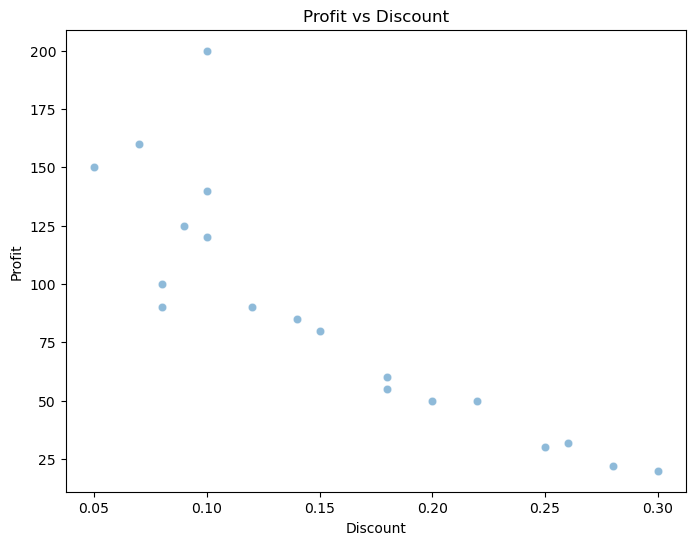

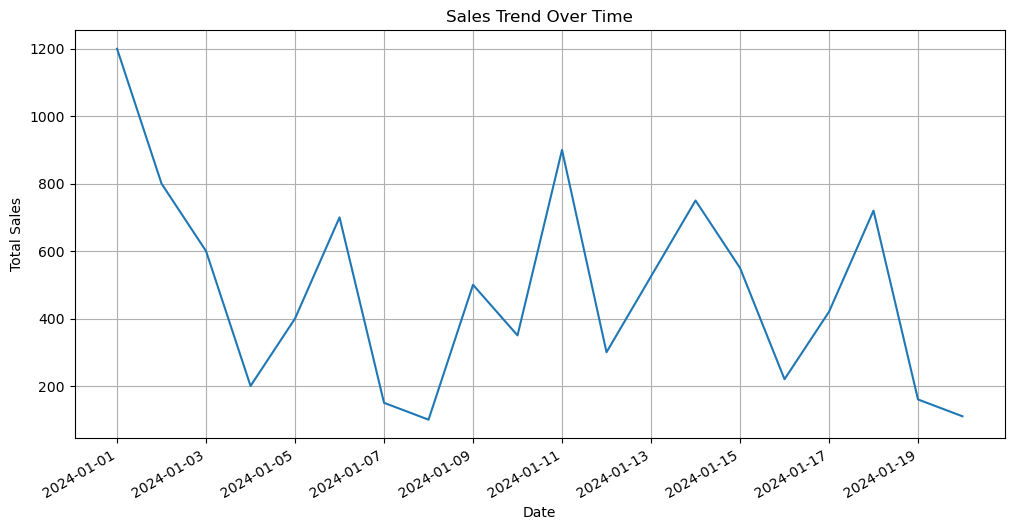


Model Performance:
R² Score: 0.9615485424292444
Mean Squared Error: 3941.274401002454

Insights & Recommendations:
- High-profit products contribute more to revenue.
- Discounting should be optimized to maintain profits.
- Top-performing regions should be prioritized for sales strategies.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Create a Sample Dataset (sales_data.csv)
data = {
    "Date": pd.date_range(start="2024-01-01", periods=20, freq="D"),
    "Product": [
        "Laptop", "Smartphone", "Tablet", "Headphones", "Smartwatch", "Monitor", "Keyboard", "Mouse", "Printer", "Speakers",
        "Camera", "Tripod", "Laptop", "Smartphone", "Tablet", "Headphones", "Smartwatch", "Monitor", "Keyboard", "Mouse"
    ],
    "Region": ["North", "South", "West", "East"] * 5,
    "Sales": [1200, 800, 600, 200, 400, 700, 150, 100, 500, 350, 900, 300, 1300, 750, 550, 220, 420, 720, 160, 110],
    "Profit": [200, 150, 100, 50, 80, 120, 30, 20, 90, 60, 160, 50, 250, 140, 90, 55, 85, 125, 32, 22],
    "Discount": [0.1, 0.05, 0.08, 0.2, 0.15, 0.1, 0.25, 0.3, 0.12, 0.18, 0.07, 0.22, 0.05, 0.1, 0.08, 0.18, 0.14, 0.09, 0.26, 0.28],
    "Category": ["Electronics", "Electronics", "Electronics", "Accessories", "Accessories", "Electronics", "Accessories", "Accessories", 
                 "Electronics", "Accessories", "Electronics", "Accessories", "Electronics", "Electronics", "Electronics", "Accessories", 
                 "Accessories", "Electronics", "Accessories", "Accessories"]
}

# Save dataset
df = pd.DataFrame(data)
df.to_csv("sales_data.csv", index=False)
print("Dataset 'sales_data.csv' created successfully!")

# Step 2: Load Dataset
df = pd.read_csv("sales_data.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Data Cleaning
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)  # Fill missing values
df.drop_duplicates(inplace=True)  # Remove duplicates

# Handle Outliers using IQR method
Q1 = df[['Sales', 'Profit', 'Discount']].quantile(0.25)
Q3 = df[['Sales', 'Profit', 'Discount']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Sales','Profit','Discount']]< (Q1-1.5 * IQR)) | (df[['Sales','Profit','Discount']]>(Q3 + 1.5 * IQR ))).any(axis=1)]
        
#Step 4: Data Visualization
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], bins=10, kde=True, color="blue")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Discount'], y=df['Profit'], alpha=0.5)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('Date')['Sales'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Step 5: Sales Prediction using Linear Regression
X = df[['Profit', 'Discount']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

# Step 6: Insights and Recommendations
print("\nInsights & Recommendations:")
print("- High-profit products contribute more to revenue.")
print("- Discounting should be optimized to maintain profits.")
print("- Top-performing regions should be prioritized for sales strategies.")